#  Hypothesis Prioritisation and A/B Test Result Analysis for E-Commerce Website

### Project Description
There is a list of hypothesis for revenue growth, created with the involvement of marketing department.  
We need to:  
1. prioritise the hypothesis from the list,  
2. run an A/B test (outside the notebook),   
3. analyse given results of the A/B test.



<a name='back'></a>
## Navigation
- [Libraries](#libraries)  
- [1. Data Introduction ](#dataintro)  
- [2. Data Cleaning](#datacleaning)      
- [3. Data Analysis](#analysis)
    - [3.1. Part 1. Hypothesis Prioritisation](#part1)
    - [3.2. Part 2. A/B Test Result Analysis](#part2)
- [4. Overall Conclusion](#conclusion)

### Libraries <a name="libraries"></a>

In [1]:
# Import the libraries we will need
import pandas as pd
import matplotlib.pyplot as plt 
from math import factorial 
from scipy import stats as st 
import scipy.stats as stats
import numpy as np  

 <a name="dataintro"></a>
## 1. Data Introduction
#### [back to navigation](#back) 

#### Data Description
**Hypothesis** table includes:
- `Hypothesis` — short description of a hypothesis;
- `Reach` — users reach on a scale from 1 to 10;
- `Impact` — impact on users on a scale from 1 to 10;
- `Confidence` — confidence in the hypothesis on a scale from 1 to 10;
- `Efforts` — efforts needed for the hypothesis test on a scale from 1 to 10. The higher the Efforts figure, the more cost-consuming the hypothesis test is.

**Orders** table includes:
- `transactionId` — order ID number;
- `visitorId` — ID of a user who made an order;
- `date` — date of order;
- `revenue` — order revenue;
- `group` — which A/B test group the order appeared in.

**Visitors** table includes:
- `date` — date;
- `group` — A/B test group;
- `visitors` — number of users in the A/B test group at the date.

In [8]:
# create a function that prints 
# name of a dataset, its info, nuns number in each coloumn, and number of duplicated lines
def info_nans_doubles(df):
    name =[x for x in globals() if globals()[x] is df][0] # take out the dataframe name
    print('Info of {} dataframe\n'.format(name))
    print(df.info())
    print('--------------------------------------------')
    for i in df.columns:
        print('Number of NaNs in coloumn ', i, ' = ', df[i].isnull().sum())
    print('--------------------------------------------')
    print('Number of duplicates in the dataframe {}'.format(name), df.duplicated().sum())

In [9]:
# Read the file with Hypothesis table and check the content (look at its 5 random lines)
hypothesis = pd.read_csv('datasets/hypothesis_project_7', index_col=0)
hypothesis.sample(5)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


In [10]:
# using the function info_nans_doubles, check the table information
info_nans_doubles(hypothesis)

Info of hypothesis dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 7 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
ICE           9 non-null float64
RICE          9 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 576.0+ bytes
None
--------------------------------------------
Number of NaNs in coloumn  hypothesis  =  0
Number of NaNs in coloumn  reach  =  0
Number of NaNs in coloumn  impact  =  0
Number of NaNs in coloumn  confidence  =  0
Number of NaNs in coloumn  efforts  =  0
Number of NaNs in coloumn  ICE  =  0
Number of NaNs in coloumn  RICE  =  0
--------------------------------------------
Number of duplicates in the dataframe hypothesis 0


In [11]:
# Read the Orders table
orders = pd.read_csv('datasets/orders_project_7', index_col=0)
orders.sample(5)

,Unnamed: 0,transactionId,visitorId,date,revenue,group
659,659,3615982016,4194288377,2019-08-26,4698,B
750,750,3133733765,1255412427,2019-08-20,3170,A
1019,1019,453824282,4256040402,2019-08-31,1850,B
423,423,4161654914,990904712,2019-08-19,11249,B
1052,1052,375844049,600884435,2019-08-11,14489,B


In [12]:
# check the Orders table info using the info_nans_doubles function
info_nans_doubles(orders)

Info of orders dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
Unnamed: 0       1197 non-null int64
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(4), object(2)
memory usage: 56.2+ KB
None
--------------------------------------------
Number of NaNs in coloumn  Unnamed: 0  =  0
Number of NaNs in coloumn  transactionId  =  0
Number of NaNs in coloumn  visitorId  =  0
Number of NaNs in coloumn  date  =  0
Number of NaNs in coloumn  revenue  =  0
Number of NaNs in coloumn  group  =  0
--------------------------------------------
Number of duplicates in the dataframe orders 0


In [13]:
# Read the Visitors table
visitors = pd.read_csv('datasets/visitors_project_7', index_col=0)
visitors.sample(5)

,date,group,visitors
4,2019-08-05,A,756
14,2019-08-15,A,628
26,2019-08-27,A,711
17,2019-08-18,A,668
13,2019-08-14,A,735


In [14]:
# # check the Visitors table info using the info_nans_doubles function
info_nans_doubles(visitors)

Info of visitors dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.9+ KB
None
--------------------------------------------
Number of NaNs in coloumn  date  =  0
Number of NaNs in coloumn  group  =  0
Number of NaNs in coloumn  visitors  =  0
--------------------------------------------
Number of duplicates in the dataframe visitors 0


### Conclusion
Coloumns titles in hypothesis dataframe should be converted into lowercase.  
No other data preparation is needed.

 <a name="datacleaning"></a>
## 2. Data Cleaning
#### [back to navigation](#back) 

In [15]:
# lowercase the titles in hypothesis dataframe coloumns
hypothesis.columns = hypothesis.columns.str.lower()

 <a name="analysis"></a>
 ## 3. Data Analysis
 <a name="part1"></a>
##  Part 1. Hypothesis Prioritisation
#### [back to navigation](#back) 

In [16]:
# Use ICE framework for hypothesis prioritisation
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False) # Sort in descending order

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


According to ICE framework, the most promising hypothesis are: 8, 0, 7, 6.


In [11]:
# Use RICE framework for hypothesis prioritisation
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False) # Sort in descending order

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


According to RICE framework, the most promising hypothesis are: 7, 2, 0, 6.

In [17]:
# print the highest priority hypothesis
print(hypothesis['hypothesis'][7])
print(hypothesis['hypothesis'][0])

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


## Conclusion 
According to RICE framework, the most promising hypothesis are: **7, 2, 0**.  
According to ICE framework, the most promising hypothesis are: **8, 0, 7**.

Hypothesis #8 was put aside, as its low reach will not bring significant results.  
Hypothesis #2 was not included into top by ICE, despite its high reach, as its impact is not high enough.

The hepothesis recommended for testing (#7 and #0):  
**- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**   
**- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**  
English version:  
**- Add a sign in form to all basic pages to build customers database for e-mail campaigns**  
**- Add two new traffic aquisition channels to attract 30% more users**

 <a name="part2"></a>
##  Part 2. A/B Test Result Analysis
#### [back to navigation](#back) 

Analyse the provided A/B test result.

In [18]:
# Create a table with visitors, buyers and orders data accumulated by day and test group 

# create an array of unique date - test group pairs:
datesGroups = orders[['date','group']].drop_duplicates()

# get aggregated cummulative data on orders and buyers by days:
orders_aggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)\
.sort_values(by=['date','group'])

# similarly, get ggregated cummulative data on visitors by days:
visitors_aggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                          visitors['group'] == x['group'])]\
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                        .sort_values(by=['date','group'])

# merge the cummulative data in on table and name its coloumns:
cummulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date','group'], right_on=['date','group'])
cummulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


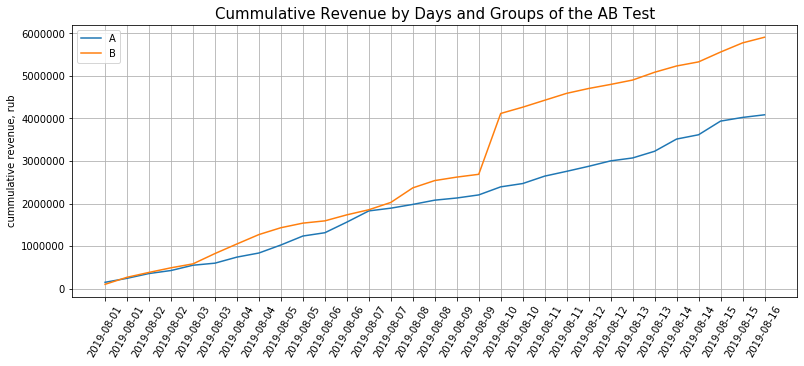

In [19]:
# Build graphs of cummulative revenue by days and groups of the AB test:

# a df with cummulative orders number and revenue by day in group A
a_cum_rev = cummulative_data[cummulative_data['group']=='A'][['date','revenue', 'orders']]
# a df with cummulative orders number and revenue by day in group B
b_cum_rev = cummulative_data[cummulative_data['group']=='B'][['date','revenue', 'orders']]

# Graph
figure, ax = plt.subplots(figsize=(13, 5))
ax.plot(a_cum_rev['date'], a_cum_rev['revenue'], label='A') # group А revenue graph
ax.plot(b_cum_rev['date'], b_cum_rev['revenue'], label='B') # group B revenue graph
ax.set_title('Cummulative Revenue by Days and Groups of the AB Test', fontsize='15')
ax.set_xticklabels(cummulative_data['date'], rotation=60) # rotate dates on the x axis
ax.set_ylabel('cummulative revenue, rub')
ax.grid(True)
plt.legend(); # add legend

Revenue grows almost steadily throughout the testing period.  

According to the graph, afer August 3rd, cummulative revenue of group B exceeded that of group A.  
By August 7th, the metrics got equal due to the leap of August 6-7th in group A. Nonetheless, after that there were sharp increases of revenue in group B (especially on August 9th) that secured group B revenue surpass. That can indicate either an increase in orders number, or appearence of significantly expensive orders in the sample.  


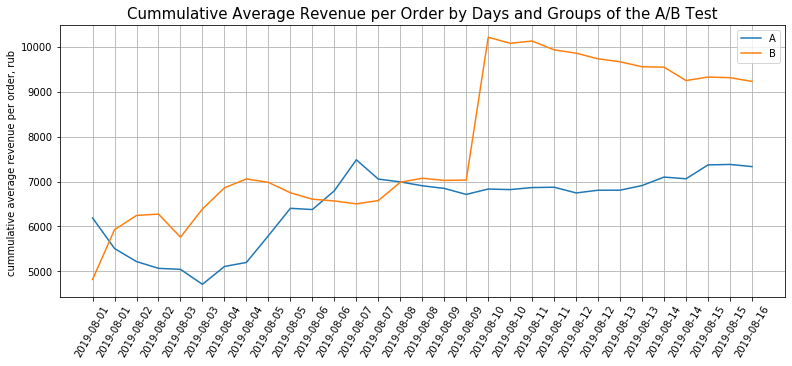

In [20]:
# Build a graph of cummulative average revenue per order by groups
figure, ax = plt.subplots(figsize=(13, 5))
ax.set_title('Cummulative Average Revenue per Order by Days and Groups of the A/B Test', fontsize=15)
ax.plot(a_cum_rev['date'], a_cum_rev['revenue']/a_cum_rev['orders'], label='A')
ax.plot(b_cum_rev['date'], b_cum_rev['revenue']/b_cum_rev['orders'], label='B')
ax.set_xticklabels(cummulative_data['date'], rotation=60)
ax.set_ylabel('cummulative average revenue per order, rub ')
ax.grid(True)
ax.legend();

Average revenue per order flactuates and grows till August 7-8th.  
For **group A** average revenue per order stablised after August 7th at the level of around 7,000 RUB, later flactuations are relatively weak.   
On the *9th of August* there was a sharp increase of the metric in **group B**. Afterwards, it started going down, however the commulative metric remained higher than that of group A. It is possible that there were large orders in group B that day. In that case, group B needs more data for its average revenue per order to get to its real value and stablise at that level.

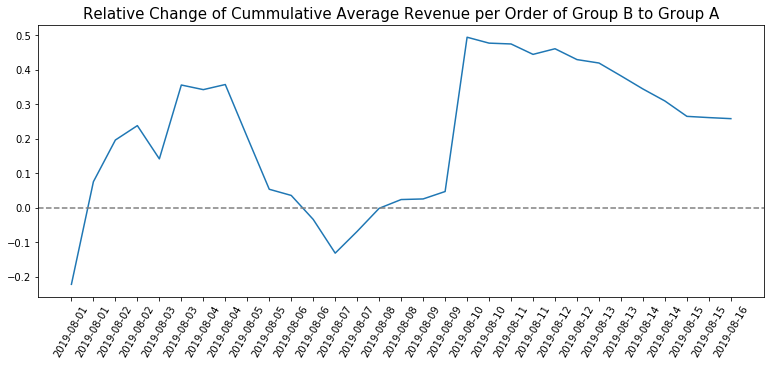

In [21]:
# Build a grapth of relative change of cummulative average revenue per order of group B to group A

# merge the data in one df
merged_cum_rev = a_cum_rev.merge(b_cum_rev, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

# build the average revenues per order ratios
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(merged_cum_rev['date'], (merged_cum_rev['revenue_B']/merged_cum_rev['orders_B'])/\
                                 (merged_cum_rev['revenue_A']/merged_cum_rev['orders_A'])-1)
ax.set_title('Relative Change of Cummulative Average Revenue per Order of Group B to Group A', fontsize=15)
ax.set_xticklabels(cummulative_data['date'], rotation=60)
ax.axhline(y=0, color='grey', linestyle='--'); # add axis X

According to the graph above, the relative change of cummulative average revenue per order was in favour of group B starting from day 2. However, the period betwen August 5th and 9th was an exception from that trend.  
Again, we can see the leap in revenue of August 9th.  

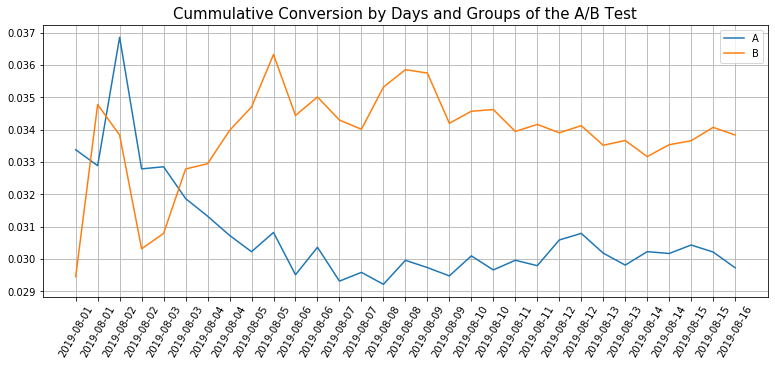

In [22]:
# Build a graph of cummulative conversion by groups

# calculate cummulative conversion
cummulative_data['conversion'] = cummulative_data['orders']/cummulative_data['visitors']
# separate group A data
a_cum_data = cummulative_data[cummulative_data['group']=='A']
# separate group B data
b_cum_data = cummulative_data[cummulative_data['group']=='B']

# build graphs
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(a_cum_data['date'], a_cum_data['conversion'], label='A')
ax.plot(b_cum_data['date'], b_cum_data['conversion'], label='B')
ax.set_title('Cummulative Conversion by Days and Groups of the A/B Test', fontsize=15)
ax.set_xticklabels(cummulative_data['date'], rotation=60)
ax.grid(True)
ax.legend();


Commulative conversion metric flactuated for both groups at the start of the test, but after August the 5th the flactuations with groups became less significant.  
Group A conversion went down and stablised at the level between 2.9% and 3.1%.  
Group B conversion had larger range - from 3.3% to 3.6% - while remaining higher than that of group A.

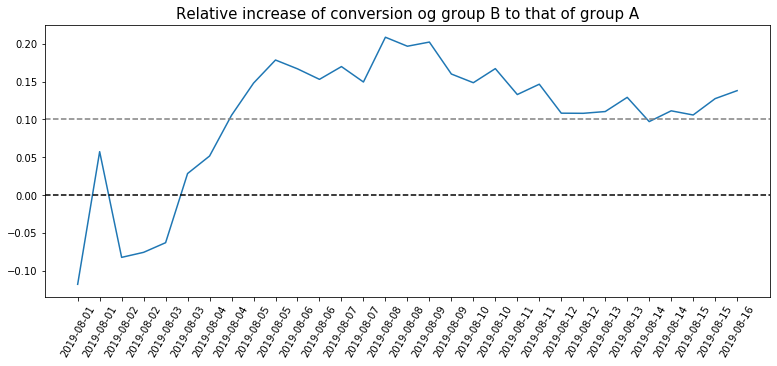

In [23]:
# Build a graph of relative change of cummulative conversion of group B to group A
cum_conv_merged = a_cum_data[['date','conversion']].merge(b_cum_data[['date','conversion']], left_on='date', 
                                                          right_on='date', how='left', suffixes=['_A', '_B'])

fig, ax = plt.subplots(figsize=(13,5))
ax.plot(cum_conv_merged['date'], cum_conv_merged['conversion_B']/cum_conv_merged['conversion_A']-1)
ax.set_title("Relative increase of conversion og group B to that of group A", fontsize=15)
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=0.1, color='grey', linestyle='--')
ax.set_xticklabels(cummulative_data['date'], rotation=60);
#ax.grid(True);



At the beginning of the test, group B was loosing to group A, but then it exceeded. Later on its conversion fell again, but the flactuations were less significant.

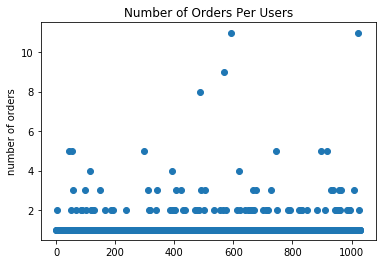

In [39]:
# Build a scatter plot for the number of orders by users

orders_by_user = (orders.groupby(['visitorId'])['transactionId'].count()).reset_index()
orders_by_user.columns = ['visitor', 'orders']

x_values = pd.Series(range(0,len(orders_by_user['orders'])))
plt.scatter(x_values, orders_by_user['orders'])
plt.ylabel('number of orders')
plt.title('Number of Orders Per Users');

In [38]:
orders_by_user.groupby('orders')['visitor'].count().reset_index()

,orders,visitor
0,1,937
1,2,64
2,3,17
3,4,3
4,5,6
5,8,1
6,9,1
7,11,2



Most of buyers made 1-2 purchases throughout the test time, some made 3. But there are some who ordered up to 11 times. Let's check if these should be considered as outliers.

In [40]:
# Define the border for anomalies
# Find 95th and 99th percentiles for the number of orders per user
np.percentile(orders_by_user['orders'], [95,99])


array([2., 4.])

**Less than 5%** of buyers make **more than 2 purchaces**, and less than 1% make more than 4 orders.  
Thus, the number of orders per user larger than 2 can be considered an anomaly.

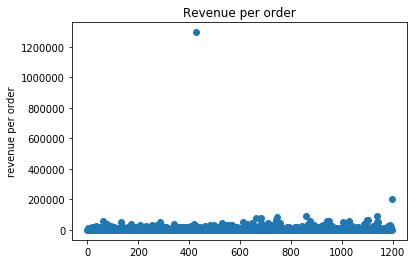

In [42]:
# Build a scatter plot for orders value
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Revenue per order')
plt.ylabel('revenue per order');

In [43]:
# Find 95th and 99th percentiles of order revenue. Define the border for anomalies.
np.percentile(orders['revenue'],[95,99])

array([28000. , 58233.2])

Not more than 5% of orders are worth more than 28,000 RUB, and less than 1% - more than 58,233.2 RUB.  
Taking 5% as the anomaly border, orders valued more than 28,000 are artefacts.

In [44]:
# Calculate the statistical significance of the difference in conversions of two groups, using raw data. 

# First, compose a table with test results data for groups A and B

# find the number of visitors per day in group A
a_visitors_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
a_visitors_daily.columns = ['date', 'visitors_daily_a']
# find the cummulative number of visitors per day in group A
a_visitors_cum = a_visitors_daily.apply(lambda x: a_visitors_daily[a_visitors_daily['date'] <= x['date']]\
                                        .agg({'date' : 'max', 'visitors_daily_a' : 'sum'}), axis=1)
a_visitors_cum.columns = ['date', 'visitors_cummulative_a']
# find the number of visitors per day in group B
b_visitors_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
b_visitors_daily.columns = ['date', 'visitors_daily_b']
# find the cummulative number of visitors per day in group B
b_visitors_cum = b_visitors_daily.apply(lambda x: b_visitors_daily[b_visitors_daily['date'] <= x['date']]\
                                        .agg({'date' : 'max', 'visitors_daily_b' : 'sum'}), axis=1)
b_visitors_cum.columns = ['date', 'visitors_cummulative_b']

# calculate the number of buyers ad orders per day in group A
a_orders_daily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
a_orders_daily.columns = ['date', 'a_orders_daily', 'a_rev_per_day']
# calculate the cummulative number of buyers ad orders per day in group A
a_orders_cum = a_orders_daily.apply(
    lambda x: \
        a_orders_daily[a_orders_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'a_orders_daily' : 'sum',
                'a_rev_per_day' : 'sum'}), axis=1).sort_values(by=['date'])
a_orders_cum.columns = ['date', 'a_orders_cum', 'a_rev_cum']

# calculate the number of buyers ad orders per day in group B
b_orders_daily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
b_orders_daily.columns = ['date', 'b_orders_daily', 'b_rev_per_day']
# calculate the cummulative number of buyers ad orders per day in group B
b_orders_cum = b_orders_daily.apply(
    lambda x: \
        b_orders_daily[b_orders_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'b_orders_daily' : 'sum',
                'b_rev_per_day' : 'sum'}), axis=1).sort_values(by=['date'])
b_orders_cum.columns = ['date', 'b_orders_cum', 'b_rev_cum']

# merge the data into one table
data = a_orders_daily.merge(b_orders_daily, left_on='date', right_on='date', how='left')\
    .merge(a_orders_cum, left_on='date', right_on='date', how='left')\
    .merge(b_orders_cum, left_on='date', right_on='date', how='left')\
    .merge(a_visitors_daily, left_on='date', right_on='date', how='left')\
    .merge(b_visitors_daily, left_on='date', right_on='date', how='left')\
    .merge(a_visitors_cum, left_on='date', right_on='date', how='left')\
    .merge(b_visitors_cum, left_on='date', right_on='date', how='left')

data.head(5)

,date,a_orders_daily,a_rev_per_day,b_orders_daily,b_rev_per_day,a_orders_cum,a_rev_cum,b_orders_cum,b_rev_cum,visitors_daily_a,visitors_daily_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [45]:
# Create tables with users that made at least 1 order, and total number of their orders, separately for goups A and B
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

# Create variables sampleA and sampleB, where users from different groups have respective orders number
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitors_daily_a'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitors_daily_b'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

In [48]:
# Test the hypothesis
# H0: the two groups' conversions do not differ
# H1: the two groups' conversions are statistically different

# calculate p-value using Mann-Whitney test 
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value:',"{0:.3f}".format(p_value))

# print the hypothesis test outcome
if p_value > 0.05:
    print('H0 (there is no statistical difference in the two groups conversions) cannot be rejected.')
else:
    print('H0 of no statistical difference in the two groups conversions is rejected. \
The difference of the groups results is statistically significant.')
    
# Print the relative increase of conversion in group B:
print('Relative increase of conversion rate in group B:',"{0:.0%}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.008
H0 of no statistical difference in the two groups conversions is rejected. The difference of the groups results is statistically significant.
Relative increase of conversion in group B: 14%


If calculated using raw data (with outliers), there is a statistically significant difference between the two groups conversions. Group B conversion is 14% higher.

In [51]:
# Test statistical significance of difference in average revenue per order of the two groups using raw data

# calculate p-value using Mann-Whitney test 
p_value_rev = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value: {0:.3f}'.format(p_value_rev))

# calculate revenue difference between the two groups
revenue_difference = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

# print the hypothesis test outcome
if p_value_rev > 0.05:
    print('H0 (there is no statistical difference in the two groups average revenue per order) cannot be rejected.')
else:
    print('H0 of no statistical difference in the two groups metrics is rejected.')
    
print('Relative difference between the two groups average revenue per order: {0:.0%}.'.format(revenue_difference))

p-value: 0.365
H0 (there is no statistical difference in the two groups average revenue per order) cannot be rejected.
Relative difference between the two groups average revenue per order: 26%.


If calculated using raw data, there is no statistically significant difference between the two groups revenues per order.  
Group B RPO is 26% higher.

In [52]:
# Earlier we defined users who made 3+ orders or ordered for more than 28,000 RUB as anomalies.
# Create a sample of those users:
abnormal_orders_number = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId']], axis = 0)
abnormal_orders_value = orders[orders['revenue'] > 28000]['visitorId']
abnormal_users = pd.concat([abnormal_orders_number, abnormal_orders_value], axis = 0).drop_duplicates().sort_values()
print('Number of anomalies:', len(abnormal_users)) # count such users

Number of anomalies: 74


In [55]:
# Let's see how anomalies impacted the test results - 
# calculate statistical significance of differences in conversion rates of the two groups, using filtered data.

# First, prepare samples of number of orders per user by test groups:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(data['visitors_daily_a'].sum() \
                                                          - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(data['visitors_daily_b'].sum() \
                                                          - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# Applu Mann-Whitney test to these samples:
p_value_filtered_conv = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("P-value: {0:.3f}".format(p_value_filtered_conv))

if p_value_filtered_conv > 0.05:
    print('H0 (there is no statistical difference in the two groups conversions) cannot be rejected.')
else:
    print('H0 of no statistical difference in the two groups conversions is rejected. \
The difference of the groups results is statistically significant.')
    
print("Relative increase of conversion rate in group B (using filtered data): {0:.0%}."\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.007
H0 of no statistical difference in the two groups conversions is rejected. The difference of the groups results is statistically significant.
Relative increase of conversion rate in group B (using filtered data): 17%.


Both raw and filtered (of outliers) data show statistically significant differences.  
Calculated using filtered data, conversion rates difference is 17% (while it is 14% in raw data, this is the impact of the outliers).

In [56]:
# Test statistical significance of difference in average revenue per order of the two groups using filtered data
p_value_rev_filtered = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]

revenue_difference_filtered = orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()/\
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1
    
print("P-value: {0:.3f}".format(p_value_rev_filtered))

if p_value_rev_filtered > 0.05:
    print('H0 (there is no statistical difference in the two groups average revenue per order) cannot be rejected.')
else:
    print('H0 of no statistical difference in the two groups metrics is rejected.')
    
print("Relative difference between the two groups average revenue per order (using filtered data): {0:.0%}.".format(revenue_difference_filtered))

P-value: 0.369
H0 (there is no statistical difference in the two groups average revenue per order) cannot be rejected.
Relative difference between the two groups average revenue per order (using filtered data): -2%.



Neither raw, nor filtered data showed statistically significant differences in average revnue per order.  
However, calculated using filtered data, average revenue per order in group A is 2% higher than in group B.  
This metric was quite the opposite while calculated using raw data - average revenue per order in group B was 26% higher than in group A. This demonstrates how anomalies impact test results.

#### The test result based decision
Facts on hands:
- Both raw and filtered (of outliers) data show statistically significant differences in groups conversion rates. Calculated using filtered data, conversion rates difference is 17% (while it is 14% in raw data, this is the impact of the outliers) in favour of B group.  
- Neither raw, nor filtered data showed statistically significant differences in average revnue per order. Calculated using filtered data, average revenue per order in group A is 2% higher than in group B (calculated using raw data - this metric in group B was 26% higher than in group A). This demonstrates how anomalies impact test results.

**The recommended decision is to stop the test and declare the win of group B by conversion rate metric.**

<a name='conclusion'></a>
## 4. Overall Conclusion  
#### [back to navigation](#back) 

### Hypothesis Prioritisation
We used ICE and RICE frameworks to evaluate hypothesis and picked two most promising:  
**- Add a sign in form to all basic pages to build customers database for e-mail campaigns**;
**- Add two new traffic aquisition channels to attract 30% more users**.



---
### A/B Test Results Analysis
Also, we analysed the results of A/B test that was run on e-store visitors from the 1st to 16th of August.  

**Revenue** was growing roughly steadily in both test groups throughout the testing period.  
Afer August 3rd, cummulative **revenue of group B exceeded that of group A**.  
By August 7th, the metrics got equal due to the leap of August 6-7th in group A. Nonetheless, after that there were sharp increases of revenue in group B (especially on August 9th) that secured group B revenue surpass. That can indicate either an increase in orders number, or appearence of significantly expensive orders in the sample. *Such anomalies can impact the test result, so we studied them separately*.

**Average revenue per order** was flactuating and growing until August 7-8th.  
For group A average revenue per order stablised after August 7th at the level of around 7,000 RUB, later flactuations are relatively weak.  
On the 9th of August there was a sharp increase of the metric in group B. Afterwards, it started going down, however the commulative metric remained higher than that of group A. It is possible that there were large orders in group B that day. In that case, group B needs more data for its average revenue per order to get to its real value and stablise at that level.  
By August 16th, **average revenue per order in group B was higher than in group A**.   

Relative change of cummulative average revenue per order was in favour of group B starting from day 2. However, the period betwen August 5th and 9th was an exception from that trend.
Again, we can see the *leap in revenue of August 9th*.

**Conversion** metrics flactuated for both groups at the start of the test, but after August the 5th the flactuations became less significant.  
Group A conversion rate went down and stablised at the level between 2.9% and 3.1%.  
**Group B conversion rate** had larger range - from 3.3% to 3.6% - while **remaining higher than that of group A**.  
At the beginning of the test, group B was loosing to group A, but then it exceeded. Later on its conversion fell again, but the flactuations were less significant.  

We defined **borders of anomalies** by analysing number of orders per user and orders values.  
**More than 2 orders per user and orders valued more than 28,00 RUB** can be considered **artefacts**. Such cases make less than 5%. The number of anomalies is 74.  

We used Mann-Whitney stat test to metrics calculated of raw and filtered (of anomalies) data.  
- Both raw and filtered data show statistically significant differences between groups conversion rates. Calculated using filtered data, conversion rates difference is 17% (while it is 14% in raw data, this is the impact of the outliers) in favour of B group.  
- Neither raw, nor filtered data showed statistically significant differences in average revnue per order. Calculated using filtered data, average revenue per order in group A is 2% higher than in group B (calculated using raw data - this metric in group B was 26% higher than in group A).  

Nevertheless, conversion rate in group B is definately higher than that of group A. While no statically significant difference is found between the two groups for the second metric - average revenue per oder.  
Considering the revealed facts, **the recommended decision is to stop the test and declare the win of group B by conversion rate metric**.